In [134]:
import matplotlib.pyplot as plt 
import datetime
import numpy as np
from datetime import timedelta  
from statsmodels.tsa.ar_model import AR
from random import random
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statsmodels.api as sm

In [98]:
print(np.array(range(101,200)))

[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199]


In [99]:
# get the data
inp = [1339, 1462, 1702, 1656, 1439, 1208, 1613, 1935, 1964, 2003, 2023, 1559, 1274, 1805, 2051, 2024, 2049, 1998, 1441, 1257, 1559, 1643, 1464, 1521, 1576, 1381, 1372, 1610, 1926, 2018, 1930, 1868, 1551, 1471, 1954, 2079, 2061, 2001, 2031, 1574, 1165, 1366, 1384, 1342, 1543, 1509, 1598, 1349, 1625, 1932, 2079, 1857, 1443, 1332, 1149, 1471, 1595, 1498, 1433, 1401, 1178, 972, 1283, 1468, 1456, 1466, 1378, 1208, 1038, 1344, 1379, 1418, 1466, 1414, 1129, 948, 1285, 1373, 1379, 599, 614, 850, 672, 747, 732, 834, 996, 900, 792, 688, 781, 696, 834, 1026, 974, 1001, 997, 1110, 1212, 1301, 1322, 1253, 935, 857, 1082, 1112, 1291, 1391, 1384, 1089, 963, 1174, 1420, 1349, 1338, 1335, 1075, 952, 1376, 1586, 1571, 1543, 1525, 1223, 1066, 1555, 1704, 1745, 1749, 1687, 1288, 1152, 1492, 1728, 1742, 1732, 1510, 1288, 1280, 1659, 1852, 1823, 1723, 1416, 1187, 1014, 1324, 1618, 1736, 1552, 1598, 1158, 1083, 1383, 1595, 1540, 1551, 1447, 1128, 1057, 1371, 1746, 1653, 1726, 1759, 1297, 1165, 1480, 1693, 1744, 1661, 1575, 1199, 1062, 1395, 1555, 1441, 1399, 1381, 1287, 1151, 1394, 1660, 1761, 1874, 1863, 1544, 1340, 1707, 1983, 1785, 1725, 1765, 1520, 1274, 1763, 1793, 1853, 1861, 1733, 1575, 1304, 1793, 1886, 1832, 1993, 1805, 1521, 1332, 1813, 1833, 1633, 1682, 1699, 1392, 1249, 1601, 1827, 1755, 1560, 1181, 1039, 920, 1106, 1269, 1159, 1192, 1203, 1876, 1065, 1294, 1249, 1145, 1098, 1171, 996, 807, 1081, 1258, 1201, 1273, 1165, 944, 797, 948, 1160, 1387, 1364, 1061, 916, 901, 1047, 1107, 1234, 1290, 1027, 877, 629, 789, 977, 953, 983, 927, 870, 724, 824, 1015, 1062, 962, 1046, 766, 764, 876, 975, 917, 914, 1239, 1000, 753, 892, 1000, 1509, 1183, 955, 862, 659, 780, 916, 1010, 988, 1032, 856, 729, 917, 1038, 1146, 1228, 1210, 939, 913, 1045, 1131, 1076, 1068, 1073, 919, 809, 963, 1095, 1150, 950, 909, 889, 840, 1156, 1221, 1247, 1146, 1142, 969, 912, 1103, 1146, 1118, 1193, 1200, 1065, 908, 1491, 1968, 2100, 2402, 2489, 2110, 2046, 2288, 2835, 2620, 2467, 2262, 2046, 1711, 1960, 2241, 2383, 2463, 2289, 1847, 1654, 2040, 2473, 2492, 2501, 2566, 2284, 2063, 2655, 2878, 2957, 2710, 2526, 2105, 1782, 2242, 2520, 2246, 2378, 2545, 2154, 2022, 2711, 3142, 2952, 2882, 2766, 2104, 1745, 2043, 2495, 2555, 2572, 2723, 2276, 1936, 2472, 2800, 2843, 2670, 2769, 2267, 2213, 2695, 2801, 2608, 2418, 1940, 1610, 1459, 1972, 2292, 2573, 2630, 2448, 2022, 1869, 2313, 2551, 2653, 2595, 2373, 2088, 1954, 2374, 2780, 2674, 2675, 2445, 2095, 1806, 2279, 2639, 2616, 2152, 2055, 1775, 1682, 2151, 2386, 2519, 2381, 2394, 1832, 1729, 1953, 2224, 2164, 2121, 2103, 1693, 1557, 1859, 1884, 1949, 1861, 1727, 1489, 1197, 1385, 1412, 1165, 957, 475, 1301, 1148, 1272, 1333, 983, 1263, 1513, 1510, 1371, 1567, 1814, 1870, 2014, 1923, 1506, 1262, 1342, 1531, 1360, 1526, 1542, 1269, 1175, 1377, 1615, 1578, 1564, 1514, 1261, 1087, 1389, 1736, 1819, 1890, 1652, 1521, 1274, 1592, 1694, 1705, 1869, 1910, 1544, 1341, 1679, 1823, 1845, 1921]

In [100]:
# creat a date-time variable
dayone = datetime.datetime(2012, 10, 1, 18, 00)
dates = []
for i,v in enumerate(inp):
    dates.append(dayone+timedelta(days=i))

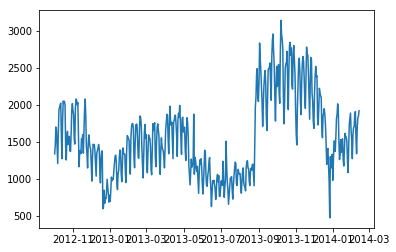

In [101]:
series = pd.Series(inp,index=dates)
series = series.asfreq('d')
plt.plot(series)

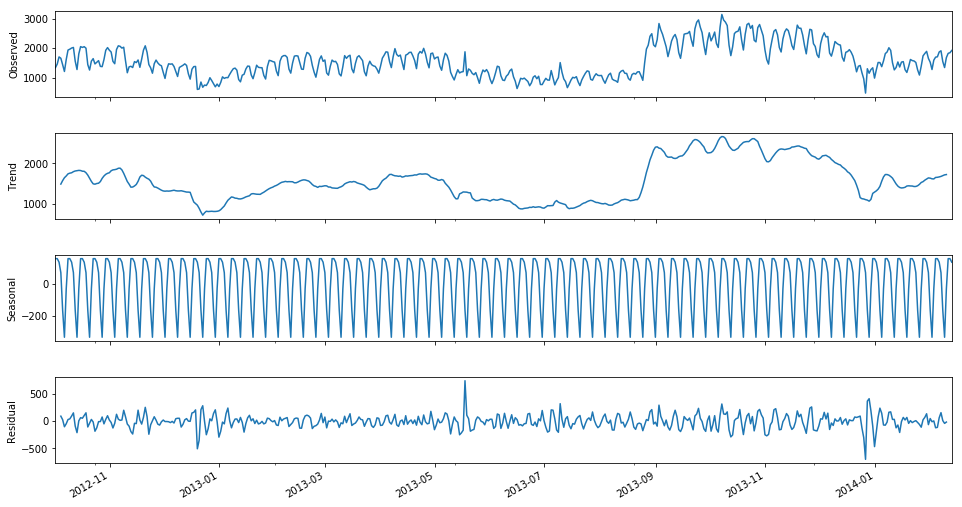

In [137]:
res = sm.tsa.seasonal_decompose(series,freq=7)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

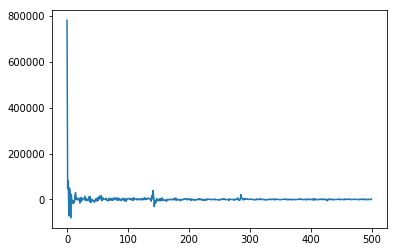

In [185]:
# clean crazy jumps
import scipy.fftpack as fft

series_fft = fft.rfft(series)
plt.plot(series_fft)
#help(fft.rfft)



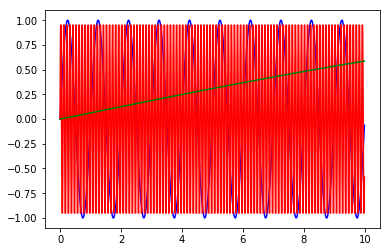

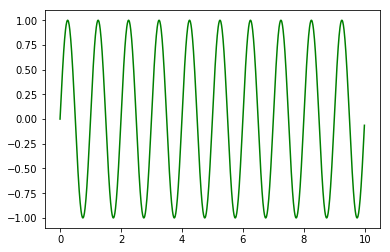

640
1000
64.0


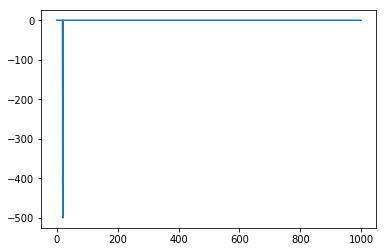

In [224]:
import numpy as np

# Get x values of the sine wave
time        = np.arange(0, 10, 0.01);

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time*2*np.pi) # 1Hz
amplitude_2 = np.sin(time*2*10*np.pi) # 10Hz
amplitude_3 = np.sin(time*2*0.01*np.pi) # 0.01Hz

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude,'b')
plt.plot(time, amplitude_2,'r')
plt.plot(time, amplitude_3,'g')
plt.show()

# compound data
d = amplitude #+ amplitude_2 #+ amplitude_3
plt.plot(time, d,'g')
plt.show()

# fourier
series_fft = fft.rfft(d)
plt.plot(series_fft)
print(np.argmax(series_fft))
print(len(time))
print(((1/0.01)/len(time))*np.argmax(series_fft))

In [53]:
# model an AR(1) model
# contrived dataset
# NON_STATIONARY; ARMA ARE HOWEVER STATIONARY MODELS (WHEN CORR < 1 and pos)
data = [x + random()*10 for x in range(1, 100)]
# fit model
model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[102.60644652 103.98964164 106.66913482 104.70544883 106.70686059
 107.48948625 109.46304863 109.94789172 109.26391973 111.43321753
 111.57406029 113.04079234 113.50722119 114.26212199 115.7042053
 115.72688268 117.07041792 117.73457462 118.83772839 119.6256545
 119.97377381 121.22028299 121.84301738 122.89037108 123.55087579
 124.27999987 125.29689252 125.89031353 126.8829142  127.58753548
 128.45230126 129.26090153 129.92314267 130.86081154 131.58116375
 132.44641346 133.18264984 133.93572106 134.79292274 135.51379728
 136.35607612 137.08994459 137.88043177 138.66450528 139.39856721
 140.21426674 140.95204584 141.74016731 142.48770545 143.23831859
 144.02198768 144.75865993 145.53298739 146.2687475  147.02325333
 147.77707879 148.51225315 149.27080252 150.00115272 150.74837168
 151.48219348 152.21505507 152.95681179 153.68130533 154.41717062
 155.13905327 155.86600199 156.59173645 157.3095999  158.03344443
 158.74653056 159.4643593  160.17676336 160.88722979 161.59905489
 162.3037951

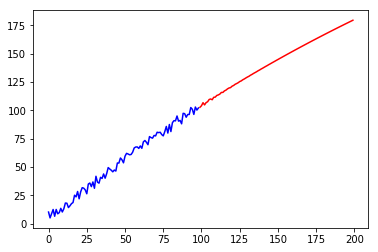

In [55]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [60]:
# model a MA model
# moving average model IS NOT a moving average of the time series
# The moving average (MA) method models the next step in the
# sequence as a linear function of the residual errors from a
# mean process at prior time steps. 
# different from AR(1) the autocorrelation function will fall
# steeply after lag h of MA(h)

# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random()*10 for x in range(1, 100)]
# fit model (disp is verbosity for model fitting)
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[78.33479657 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539 54.73790539
 54.73790539 54.73790539 54.73790539 54.73790539 54

In [63]:
help(model.fit)

Help on method fit in module statsmodels.tsa.arima_model:

fit(start_params=None, trend='c', method='css-mle', transparams=True, solver='lbfgs', maxiter=500, full_output=1, disp=5, callback=None, start_ar_lags=None, **kwargs) method of statsmodels.tsa.arima_model.ARMA instance
    Fits ARMA(p,q) model using exact maximum likelihood via Kalman filter.
    
    Parameters
    ----------
    start_params : array-like, optional
        Starting parameters for ARMA(p,q). If None, the default is given
        by ARMA._fit_start_params.  See there for more information.
    transparams : bool, optional
        Whehter or not to transform the parameters to ensure stationarity.
        Uses the transformation suggested in Jones (1980).  If False,
        no checking for stationarity or invertibility is done.
    method : str {'css-mle','mle','css'}
        This is the loglikelihood to maximize.  If "css-mle", the
        conditional sum of squares likelihood is maximized and its values
        a

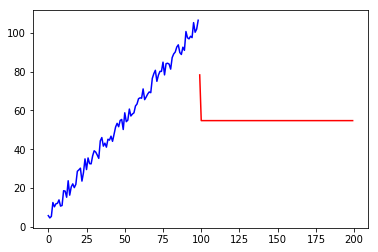

In [61]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [66]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
#data = [random() for x in range(1, 100)]
data = [x + random()*10 for x in range(1, 100)]
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data)+100)
print(yhat)

[105.28195698 105.64868152 105.46891501 105.43722719 105.36554422
 105.30479209 105.24118108 105.178445   105.11557269 105.05283782
 104.99016617 104.92757771 104.8650669  104.80263511 104.74028185
 104.67800713 104.61581082 104.55369282 104.49165305 104.42969139
 104.36780775 104.30600203 104.24427414 104.18262397 104.12105143
 104.05955642 103.99813885 103.93679861 103.87553561 103.81434974
 103.75324093 103.69220906 103.63125403 103.57037577 103.50957415
 103.4488491  103.38820051 103.32762829 103.26713234 103.20671256
 103.14636887 103.08610115 103.02590933 102.96579329 102.90575295
 102.84578822 102.78589898 102.72608516 102.66634666 102.60668338
 102.54709522 102.4875821  102.42814391 102.36878056 102.30949197
 102.25027803 102.19113865 102.13207373 102.07308319 102.01416693
 101.95532485 101.89655687 101.83786289 101.77924281 101.72069654
 101.662224   101.60382508 101.54549969 101.48724775 101.42906916
 101.37096382 101.31293165 101.25497255 101.19708643 101.1392732
 101.081532

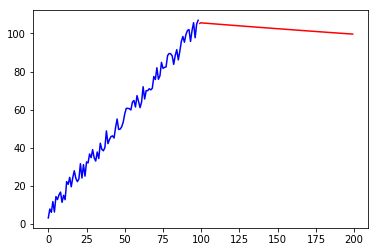

In [67]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data),len(data)+len(yhat)))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [81]:
# ARIMA
# The Autoregressive Integrated Moving Average (ARIMA)
# method models the next step in the sequence as a linear
# function of the differenced observations and residual
# errors at prior time steps.

# It combines both Autoregression (AR) and Moving Average (MA)
# models as well as a differencing pre-processing step of the
# sequence to make the sequence stationary, called integration (I).
# differencing can be down d amounts of time

from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x + random()*20 for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
# typ levels helps here to predict in the original data space
# "linear" would be on the preprocessed one (the differenced one)
yhat = model_fit.predict(len(data)-30, len(data)+100, typ='levels')
print(yhat)

[ 78.67374584  80.90251628  81.92448153  82.61939808  83.48722254
  84.82564715  86.00395156  86.72482362  86.83099396  87.83663449
  88.43366836  89.32003356  89.95095001  90.28484957  92.02449236
  93.91268295  95.25086847  96.66470229  97.72839688  99.58919597
  99.46252828 101.70445139 103.17318494 104.75738381 106.15216259
 107.82366274 109.1261695  109.703009   110.51686215 111.17686803
 112.31525241 113.34915766 114.38659692 115.42410443 116.46161325
 117.49912209 118.53663094 119.57413978 120.61164863 121.64915748
 122.68666632 123.72417517 124.76168402 125.79919286 126.83670171
 127.87421055 128.9117194  129.94922825 130.98673709 132.02424594
 133.06175478 134.09926363 135.13677248 136.17428132 137.21179017
 138.24929901 139.28680786 140.32431671 141.36182555 142.3993344
 143.43684325 144.47435209 145.51186094 146.54936978 147.58687863
 148.62438748 149.66189632 150.69940517 151.73691401 152.77442286
 153.81193171 154.84944055 155.8869494  156.92445824 157.96196709
 158.999475

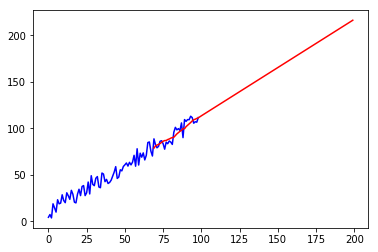

In [85]:
# plot the original data and the modeled data
plt.plot(data, 'b') # plotting t, a separately
inds = np.array(range(len(data)-30,len(data)+len(yhat)-30))
plt.plot(inds,yhat, 'r') # plotting t, b separately 
plt.show()

In [90]:
len(series)

500

In [122]:
# let's turn to our data
# fit model
model = ARIMA(series, order=(2, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
# typ "levels" helps here to predict in the original data space
start = series.index[-200] 
stop = series.index[-1] + timedelta(days=100) 

#print(start)
#print(stop)
yhat = model_fit.predict(start, stop, typ='levels')
print(yhat[0:10])

#help(model_fit.predict)


2013-07-28 18:00:00     973.560387
2013-07-29 18:00:00    1107.834893
2013-07-30 18:00:00    1122.927160
2013-07-31 18:00:00    1029.520361
2013-08-01 18:00:00    1057.501912
2013-08-02 18:00:00    1069.141938
2013-08-03 18:00:00     908.258426
2013-08-04 18:00:00     866.050926
2013-08-05 18:00:00    1061.698386
2013-08-06 18:00:00    1105.952736
Freq: D, dtype: float64


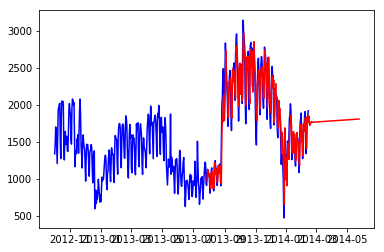

In [123]:
# plot the original data and the modeled data
plt.plot(series, 'b') # plotting t, a separately
#inds = np.array(range(len(series)-30,len(series)+len(yhat)-30))
plt.plot(yhat, 'r') # plotting t, b separately 
plt.show()

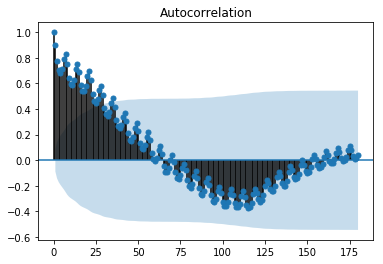

In [126]:
# check the acf function
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=180)
plt.show()

In [131]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(0, 1, 0, 60))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(start, stop)
print(yhat[0:10])

2013-07-28 18:00:00    1047.870550
2013-07-29 18:00:00     936.512703
2013-07-30 18:00:00     989.569302
2013-07-31 18:00:00     965.232899
2013-08-01 18:00:00    1261.443274
2013-08-02 18:00:00    1208.362204
2013-08-03 18:00:00    1026.769560
2013-08-04 18:00:00     695.596198
2013-08-05 18:00:00     768.420337
2013-08-06 18:00:00    1084.805383
Freq: D, dtype: float64


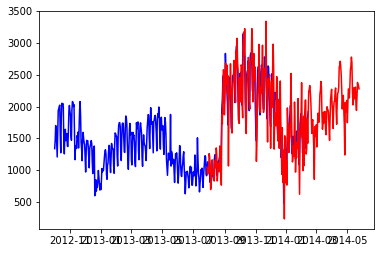

In [132]:
# plot the original data and the modeled data
plt.plot(series, 'b') # plotting t, a separately
#inds = np.array(range(len(series)-30,len(series)+len(yhat)-30))
plt.plot(yhat, 'r') # plotting t, b separately 
plt.show()

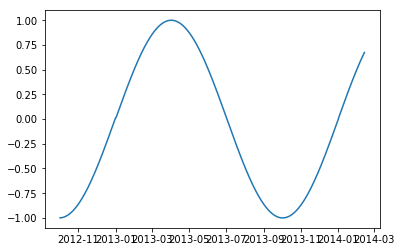

In [174]:
# for multiple seasonal effects we need exogeneous data
# here simply the seasonality as fourier components
# prepare Fourier terms
exog = pd.DataFrame(series)
exog['sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
exog['sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)
exog_to_train = exog.iloc[:(len(series)-365)]
exog_to_test = exog.iloc[(len(series)-365):]